In [1]:
pip install scikit_learn


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn import metrics


In [4]:
Credit_Card_Data=pd.read_csv("creditcard.csv")
Credit_Card_Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
Credit_Card_Data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
Credit_Card_Data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
Credit_Card_Data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
legal = Credit_Card_Data[Credit_Card_Data.Class==0]
fraud = Credit_Card_Data[Credit_Card_Data.Class==1]
print ("Normal Transactions",(legal.shape))
print ("Fraud Transactions",(fraud.shape))

Normal Transactions (284315, 31)
Fraud Transactions (492, 31)


In [9]:
X = Credit_Card_Data.drop(columns='Class', axis=1)

In [10]:
X = Credit_Card_Data.drop(columns='Class', axis=1)
Y = Credit_Card_Data['Class']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = KNeighborsClassifier()

model.fit(X_train, Y_train)

predicted =  model.predict(X_test)

In [12]:
# compute the accuracy score
score = accuracy_score(Y_test, predicted)
print("The accuracy of our model is = ", score)

The accuracy of our model is =  0.9982444436641972


In [13]:
#compute the precision score
p = precision_score(Y_test, predicted, average= None)
print("The precision of our model is = ", p)

The precision of our model is =  [0.99824423 1.        ]


In [14]:
#compute the recall score
r = recall_score(Y_test, predicted, average= None)
print("The recall of our model is = ", r)

The recall of our model is =  [1.         0.06542056]


In [15]:
#compute the f-1 score
f1 = f1_score(Y_test, predicted, average= None)
print("The F1-Score of our model is = ", f1)

The F1-Score of our model is =  [0.99912134 0.12280702]


In [16]:
pip install matplotlib


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


The Area Under the Curve for our prediction model is =  0.5327102803738317


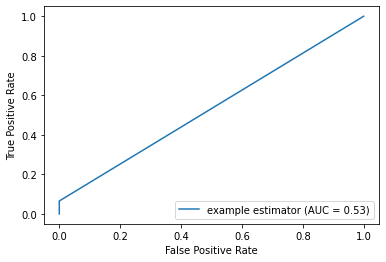

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name='example estimator')
display.plot()

area = metrics.auc(fpr, tpr)
print("The Area Under the Curve for our prediction model is = ", area)

In [1]:

display = PrecisionRecallDisplay.from_predictions(Y_test, predicted)
PR_Curve = display.ax_.set_title("2-class Precision-Recall curve")

NameError: name 'PrecisionRecallDisplay' is not defined

In [ ]:
import pickle 

knn = NearestNeighbors(10)
knn.fit(my_data)

# Its important to use binary mode 
knnPickle = open('knnpickle_file', 'wb') 
      
# source, destination 
pickle.dump(knn, knnPickle)  

# close the file
knnPickle.close()
                
      
# load the model from disk
loaded_model = pickle.load(open('knnpickle_file', 'rb'))
result = loaded_model.predict(X_test) 